## Collating with CollateX



First we need to tell Python that we will be needing the Python library that holds the code for CollateX…

In [14]:
from collatex import *

Now we're ready to make a collation object. We do this with the slightly hermetic line of code: 

    collation = Collation()
    
Here the lower case `collation` is the arbitrary named variable that refers to a copy (officially it is called an *instance*) of the CollateX collation engine. The instruction tells Python to create a new instance of a `Collation()` object and call it `collation`.

In [15]:
collation = Collation()

Now we add some witnesses. Each witness gets a letter or name (siglum) that will identify it, and for each we add the literal text of the witness to the collation object:

In [16]:
collation.add_plain_witness( "A", "The quick brown fox jumped over the lazy dog.")
collation.add_plain_witness( "B", "The brown fox jumped over the dog." )
collation.add_plain_witness( "C", "The bad fox jumped over the lazy dog." )

We now tell CollateX to collate the witnesses, create a table to visualize the results, and orient the table vertically. We’ve created a variable called `alignment_table` to hold the CollateX output. We’ll discuss the `Segmentation` parameter later.

In [17]:
alignment_table = collate(collation, layout='vertical', segmentation=False )

When we tell CollateX to create a plain text table to hold the output, it isn’t rendered by default (other CollateX output formats are), so we have to `print()` it in order to see it:

In [18]:
print( alignment_table )

+--------+--------+--------+
|   A    |   B    |   C    |
+--------+--------+--------+
|  The   |  The   |  The   |
+--------+--------+--------+
| quick  |   -    |  bad   |
+--------+--------+--------+
| brown  | brown  |   -    |
+--------+--------+--------+
|  fox   |  fox   |  fox   |
+--------+--------+--------+
| jumped | jumped | jumped |
+--------+--------+--------+
|  over  |  over  |  over  |
+--------+--------+--------+
|  the   |  the   |  the   |
+--------+--------+--------+
|  lazy  |   -    |  lazy  |
+--------+--------+--------+
|  dog   |  dog   |  dog   |
+--------+--------+--------+
|   .    |   .    |   .    |
+--------+--------+--------+


Usually we want to group our output instead of rendering each token-level set in separate cells. You can tell CollateX to construct those groups by setting the value of the `segmentation` parameter to `True`—or by not specifying a value at all, since the default behavior is equal to the `True` value. We switched this option off in the example above to show that CollateX is aware of the individual token alignments, but in most cases you’ll want to leave segmentation on. When we collate again with segmentation, we see the default grouping:

In [19]:
alignment_table = collate(collation, layout='vertical' )

In [20]:
print( alignment_table )

+---------------------+---------------------+---------------------+
|          A          |          B          |          C          |
+---------------------+---------------------+---------------------+
|         The         |         The         |         The         |
+---------------------+---------------------+---------------------+
|        quick        |          -          |         bad         |
+---------------------+---------------------+---------------------+
|        brown        |        brown        |          -          |
+---------------------+---------------------+---------------------+
| fox jumped over the | fox jumped over the | fox jumped over the |
+---------------------+---------------------+---------------------+
|         lazy        |          -          |         lazy        |
+---------------------+---------------------+---------------------+
|         dog.        |         dog.        |         dog.        |
+---------------------+---------------------+---

The aligment table visualization is CollateX's default way of rendering a collation result, but other supported output formats are `html`, `html2` (color-coded HTML), `xml` (a generic XML that can be processed further with XSLT), `tei` (also somewhat generic, but based on parallel segmentation), and `svg`. SVG outputs a *variant graph*, which shows the variation as a directed graph.

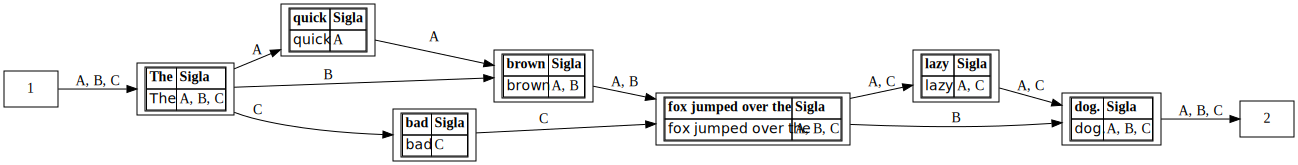

In [21]:
graph = collate( collation, output="svg", segmentation=True )

We can perform the same operation with files that we read from the file system. Note that we specify `encoding="utf-8"`.

In [22]:
collation = Collation()
witness_1859 = open( "../fixtures/Darwin/txt/darwin1859_par1.txt", encoding='utf-8' ).read()
witness_1860 = open( "../fixtures/Darwin/txt/darwin1860_par1.txt", encoding='utf-8' ).read()
witness_1861 = open( "../fixtures/Darwin/txt/darwin1861_par1.txt", encoding='utf-8' ).read()
witness_1866 = open( "../fixtures/Darwin/txt/darwin1866_par1.txt", encoding='utf-8' ).read()
witness_1869 = open( "../fixtures/Darwin/txt/darwin1869_par1.txt", encoding='utf-8' ).read()
witness_1872 = open( "../fixtures/Darwin/txt/darwin1872_par1.txt", encoding='utf-8' ).read()
collation.add_plain_witness( "1859", witness_1859 )
collation.add_plain_witness( "1860", witness_1860 )
collation.add_plain_witness( "1861", witness_1861 )
collation.add_plain_witness( "1866", witness_1866 )
collation.add_plain_witness( "1869", witness_1869 )
collation.add_plain_witness( "1872", witness_1872 )

Now let's check if these witnesses actually contain some text by printing a few of them.

In [23]:
print( witness_1859 )

WHEN we look to the individuals of the same variety or sub-variety of our older cultivated plants and animals, one of the first points which strikes us, is, that they generally differ much more from each other, than do the individuals of any one species or variety in a state of nature. When we reflect on the vast diversity of the plants and animals which have been cultivated, and which have varied during all ages under the most different climates and treatment, I think we are driven to conclude that this greater variability is simply due to our domestic productions having been raised under conditions of life not so uniform as, and somewhat different from, those to which the parent-species have been exposed under nature. There is, also, I think, some probability in the view propounded by Andrew Knight, that this variability may be partly connected with excess of food. It seems pretty clear that organic beings must be exposed during several generations to the new conditions of life to ca

In [24]:
print( witness_1860 )

WHEN we look to the individuals of the same variety or sub-variety of our older cultivated plants and animals, one of the first points which strikes us, is, that they generally differ more from each other than do the individuals of any one species or variety in a state of nature. When we reflect on the vast diversity of the plants and animals which have been cultivated, and which have varied during all ages under the most different climates and treatment, I think we are driven to conclude that this great variability is simply due to our domestic productions having been raised under conditions of life not so uniform as, and somewhat different from, those to which the parent-species have been exposed under nature. There is also, I think, some probability in the view propounded by Andrew Knight, that this variability may be partly connected with excess of food. It seems pretty clear that organic beings must be exposed during several generations to the new conditions of life to cause any a

And now let's collate those witnesses and let's put the result up as an HTML-formatted alignment table…

In [25]:
alignment_table = collate(collation, layout='vertical', output='html')

1859,1860,1861,1866,1869,1872
-,-,-,Causes ofVariability.,Causes ofVariability.,Causes ofVariability.
WHEN we,WHEN we,WHEN we,WHEN we,WHEN we,WHEN we
look to,look to,look to,look to,compare,compare
"the individuals ofthe same variety orsub-variety of ourolder cultivatedplants and animals,one of the firstpoints which strikesus","the individuals ofthe same variety orsub-variety of ourolder cultivatedplants and animals,one of the firstpoints which strikesus","the individuals ofthe same variety orsub-variety of ourolder cultivatedplants and animals,one of the firstpoints which strikesus","the individuals ofthe same variety orsub-variety of ourolder cultivatedplants and animals,one of the firstpoints which strikesus","the individuals ofthe same variety orsub-variety of ourolder cultivatedplants and animals,one of the firstpoints which strikesus","the individuals ofthe same variety orsub-variety of ourolder cultivatedplants and animals,one of the firstpoints which strikesus"
",",",",",",",",-,-
"is, that theygenerally differ","is, that theygenerally differ","is, that theygenerally differ","is, that theygenerally differ","is, that theygenerally differ","is, that theygenerally differ"
much,-,-,-,-,-
more,more,more,more,-,more
from each other,from each other,from each other,from each other,from each other,from each other
",",-,-,-,more,-


Hmm… that is still a little hard to read. Wouldn't it be nice if we got a hint where the actual differences are? Sure, try…

In [14]:
alignment_table = collate(collation, layout='vertical', output='html2')

And finally, we can also generate the variant graph for this collation…

In [26]:
graph = collate( collation, output="svg" )

**Note**: you may have noticed that **if you run the cells in an IPython notebook in order, they know about one another**. For this reason, in the end of this tutorial we could produce different outputs using the information typed into the previous cells. When you open a notebook, remember to run the cells in order or to "run all cells" (from the menu Cell), otherwise you may get an error message.